In [13]:
import os
import glob
import tensorflow.keras
import tensorflow.keras.backend as K
#from keras.layers.core import Activation
from tensorflow.keras.models import Sequential,load_model, Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM,RepeatVector,TimeDistributed, Bidirectional
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow.python.client import device_lib
from random import randint
from os import listdir
from os.path import isfile, join

from shutil import copyfile

print('Completed ...')

Completed ...


In [14]:
print(device_lib.list_local_devices())

print('Completed ...')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12165395226701020311
]
Completed ...


In [15]:
# Setting seed for reproducibility
np.random.seed(1234)  
PYTHONHASHSEED = 0

print('Completed ...')

Completed ...


read multiple experiments data file names

In [16]:

mypath = "C:/Users/doubt/Desktop/ML_New_Folder/TROD_LSTM/Data_waylee/wayleewaylee/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

print('Completed ...')

['output0.csv', 'output1.csv', 'output10.csv', 'output100.csv', 'output11.csv', 'output12.csv', 'output13.csv', 'output14.csv', 'output15.csv', 'output16.csv', 'output17.csv', 'output18.csv', 'output19.csv', 'output2.csv', 'output20.csv', 'output21.csv', 'output22.csv', 'output23.csv', 'output24.csv', 'output25.csv', 'output26.csv', 'output27.csv', 'output28.csv', 'output29.csv', 'output3.csv', 'output30.csv', 'output31.csv', 'output32.csv', 'output33.csv', 'output34.csv', 'output35.csv', 'output36.csv', 'output37.csv', 'output38.csv', 'output39.csv', 'output4.csv', 'output40.csv', 'output41.csv', 'output42.csv', 'output43.csv', 'output44.csv', 'output45.csv', 'output46.csv', 'output47.csv', 'output48.csv', 'output49.csv', 'output5.csv', 'output50.csv', 'output51.csv', 'output52.csv', 'output53.csv', 'output54.csv', 'output55.csv', 'output56.csv', 'output57.csv', 'output58.csv', 'output59.csv', 'output6.csv', 'output60.csv', 'output61.csv', 'output62.csv', 'output63.csv', 'output64.csv

Insert the experiment number for each data lines

In [35]:

for i in range(0,len(onlyfiles)):
    print('i = ' + str(i))
    with open('./Data_waylee/waylee/waylee/'+ onlyfiles[i], 'r') as program:
        data = program.readlines()
#        print(data)

    with open('./Data_waylee/waylee/waylee/'+ onlyfiles[i], 'w') as program:
        for (number, line) in enumerate(data):
            #program.write('%d\t%s' % (i, line))
            program.write(str(i) + ',' + str(line))
            #print('number = ' + str(number))

print('Completed ...')       


i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
i = 100
Completed ...


Combine files into one

In [36]:

read_files = glob.glob("./Data_waylee/waylee/waylee/*.csv")

with open("./Data_waylee/waylee/data.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

print('Completed ...')

Completed ...


In [38]:

os.chdir('C:/Users/doubt/Desktop/ML_New_Folder/TROD_LSTM/Data_waylee/waylee')
copyfile('data.txt', 'data.csv')
#os.chdir('C:/Users/doubt/Desktop/TROD_LSTM')

print('Completed ...')

Completed ...


Useful Functions

In [84]:
def padding_function(df_to_pad,restrict_length):

    # find the length of each unit 
    ids = train_df.groupby('id')
    list_of_max_cycles = list(ids.size())
    list_of_max_times = list(train_df.groupby('id').time.max())
    
    for i in range(0,len(list_of_max_cycles)):
        unit_matrix = np.full((restrict_length-list_of_max_cycles[i],1), i)
        time_matrix = np.full((restrict_length-list_of_max_cycles[i],1), 10000)
        zeros_matrix = np.zeros((restrict_length-list_of_max_cycles[i], 9))
        total_matrix = np.concatenate((unit_matrix,time_matrix),axis=1)
        total_matrix = np.concatenate((total_matrix, zeros_matrix), axis=1)
        #print(unit_matrix.shape)
        #print(zeros_matrix.shape)
        #print(total_matrix.shape)
        complimentary_df = pd.DataFrame(total_matrix) #.reset_index()
        #print(complimentary_df.values)
        complimentary_df.columns = ['id', 'timestep', 'i_pin', 'i_node', 'power', 'T_f', 'Boron_den', 'T_fuel', \
                                    'gap_k', 'hoop_s', 'gap_w', 'oxid_t']
        #print(complimentary_df.shape)
        #df_to_pad.append(complimentary_df, ignore_index=True)
        df_to_pad = pd.concat([df_to_pad, complimentary_df], ignore_index=True)
        #print(df_to_pad.shape)

    df_to_pad.sort_values(by=['id', 'timestep'],inplace=True)
    df_to_pad_values = df_to_pad.values
    df_padded = pd.DataFrame(df_to_pad_values)
    df_padded.columns = ['id', 'timestep', 'i_pin', 'i_node', 'power', 'T_f', 'Boron_den', 'T_fuel', \
                                    'gap_k', 'hoop_s', 'gap_w', 'oxid_t']
    
    df_padded.reset_index(drop=True)
    df_padded.replace(10000,0,inplace=True)
    df_padded[df_padded < 0] = 0
    return df_padded

def normalization(df_to_norm):
    # do not normalize id

    keep_id = df_to_norm[['id']]
    df_to_norm.drop(['id'], axis=1, inplace=True)        
    df_to_norm_matrix = df_to_norm.values
    df_to_norm_matrix_normed = (df_to_norm_matrix - df_to_norm_matrix.min(axis=0)) / (df_to_norm_matrix.max(axis=0)- df_to_norm_matrix.min(axis=0)) 
    normed_frame = pd.DataFrame(df_to_norm_matrix_normed)
    normed_frame.columns = ['timestep', 'i_pin', 'i_node', 'power', 'T_f', 'Boron_den', 'T_fuel', \
                                    'gap_k', 'hoop_s', 'gap_w', 'oxid_t']
    normed_frame[['id']] = keep_id
    normed_frame = normed_frame[['id', 'timestep', 'i_pin', 'i_node', 'power', 'T_f', 'Boron_den', 'T_fuel', \
                                    'gap_k', 'hoop_s', 'gap_w', 'oxid_t']]
    return normed_frame

def convert_time_to_steps(df_to_convert):
    steps = np.array(list(range(0,2623)) * 30 )
    steps = steps.T
    df_max = df_to_convert.values
    df_max[:,1] = steps
    new_df = pd.DataFrame(df_max)
    new_df.columns = ['id', 'timestep', 'i_pin', 'i_node', 'power', 'T_f', 'Boron_den', 'T_fuel', \
                                    'gap_k', 'hoop_s', 'gap_w', 'oxid_t']
    return new_df

def to_xy(df, target):
    # this function is from University of Wastington at SL
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)
    
def gen_X_Y_one_to_one_not_padded(df_to_use,window_size):
    train_x = []
    train_y = []
    for ids in list(df_to_use.id.unique()):
        current_df_ids = df_to_use[df_to_use['id']==ids]
        current_matrix_Y = current_df_ids.values[:,-1]
        current_df_ids.drop(['oxid_t'],axis=1,inplace=True)
        current_df_ids.drop(['gap_w'],axis=1,inplace=True)
        current_df_ids.drop(['hoop_s'],axis=1,inplace=True)
        current_df_ids.drop(['gap_k'],axis=1,inplace=True)
        current_matrix_X = current_df_ids.values[:,1:]
        current_length = len(current_matrix_Y)
        current_sliced_X = []
        for i in range(0,current_length-window_size+1):
            current_sliced_X = current_matrix_X[i:i+window_size,:]
            current_sliced_Y = current_matrix_Y[i]
            train_x.append(current_sliced_X)
            train_y.append(current_sliced_Y)
    return train_x,train_y

print('Completed ...')

Completed ...


In [76]:
# read training data
train_df = pd.read_csv('C:/Users/doubt/Desktop/ML_New_Folder/TROD_LSTM/Data_waylee/waylee/data.csv', sep=",", header=None)
#train_df2 = pd.read_csv('./Data_TRACE/data.csv', sep="\t", header=None)

print('Completed ...')

Completed ...


In [62]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,2.448700e-23,567.498,627.896,1671.55,4339.41,-42.6319,60.4948,0.000500
1,0,1,0,0,2.445380e-23,567.498,616.798,1671.48,4340.18,-42.8265,60.4791,0.000500
2,0,2,0,0,2.502160e-23,567.518,590.068,1687.01,4337.65,-42.9321,60.2754,0.216594
3,0,3,0,0,2.442800e-23,567.498,575.539,1678.63,4214.12,-43.1010,61.6137,0.305975
4,0,4,0,0,2.609820e-23,567.559,573.650,1718.71,4251.06,-43.0213,61.2716,0.316908


In [63]:
train_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,2.448700e-23,567.498,627.89600,1671.55,4339.41,-42.6319,60.4948,0.000500
1,0,1,0,0,2.445380e-23,567.498,616.79800,1671.48,4340.18,-42.8265,60.4791,0.000500
2,0,2,0,0,2.502160e-23,567.518,590.06800,1687.01,4337.65,-42.9321,60.2754,0.216594
3,0,3,0,0,2.442800e-23,567.498,575.53900,1678.63,4214.12,-43.1010,61.6137,0.305975
4,0,4,0,0,2.609820e-23,567.559,573.65000,1718.71,4251.06,-43.0213,61.2716,0.316908
...,...,...,...,...,...,...,...,...,...,...,...,...
2950435,100,18,12799,9,3.164720e-23,582.845,209.92200,1520.89,4236.85,-48.2050,63.6205,0.823462
2950436,100,19,12799,9,3.205860e-23,582.896,128.46400,1526.83,4236.37,-48.1702,63.5585,0.803691
2950437,100,20,12799,9,3.215820e-23,583.056,46.45740,1529.81,4264.60,-48.1821,63.4602,0.847880
2950438,100,21,12799,9,3.473390e-23,583.798,7.27875,1561.07,4321.77,-48.0330,62.9851,0.858737


In [77]:
train_df.columns = ['id', 'timestep', 'i_pin', 'i_node', 'power', 'T_f', 'Boron_den', 'T_fuel', \
                                    'gap_k', 'hoop_s', 'gap_w', 'oxid_t']
train_df

,id,timestep,i_pin,i_node,power,T_f,Boron_den,T_fuel,gap_k,hoop_s,gap_w,oxid_t
0,0,0,0,0,2.448700e-23,567.498,627.89600,1671.55,4339.41,-42.6319,60.4948,0.000500
1,0,1,0,0,2.445380e-23,567.498,616.79800,1671.48,4340.18,-42.8265,60.4791,0.000500
2,0,2,0,0,2.502160e-23,567.518,590.06800,1687.01,4337.65,-42.9321,60.2754,0.216594
3,0,3,0,0,2.442800e-23,567.498,575.53900,1678.63,4214.12,-43.1010,61.6137,0.305975
4,0,4,0,0,2.609820e-23,567.559,573.65000,1718.71,4251.06,-43.0213,61.2716,0.316908
...,...,...,...,...,...,...,...,...,...,...,...,...
2950435,100,18,12799,9,3.164720e-23,582.845,209.92200,1520.89,4236.85,-48.2050,63.6205,0.823462
2950436,100,19,12799,9,3.205860e-23,582.896,128.46400,1526.83,4236.37,-48.1702,63.5585,0.803691
2950437,100,20,12799,9,3.215820e-23,583.056,46.45740,1529.81,4264.60,-48.1821,63.4602,0.847880
2950438,100,21,12799,9,3.473390e-23,583.798,7.27875,1561.07,4321.77,-48.0330,62.9851,0.858737


In [78]:
train_df['hoop_s'] = train_df['hoop_s'] * (-1)

train_df

,id,timestep,i_pin,i_node,power,T_f,Boron_den,T_fuel,gap_k,hoop_s,gap_w,oxid_t
0,0,0,0,0,2.448700e-23,567.498,627.89600,1671.55,4339.41,42.6319,60.4948,0.000500
1,0,1,0,0,2.445380e-23,567.498,616.79800,1671.48,4340.18,42.8265,60.4791,0.000500
2,0,2,0,0,2.502160e-23,567.518,590.06800,1687.01,4337.65,42.9321,60.2754,0.216594
3,0,3,0,0,2.442800e-23,567.498,575.53900,1678.63,4214.12,43.1010,61.6137,0.305975
4,0,4,0,0,2.609820e-23,567.559,573.65000,1718.71,4251.06,43.0213,61.2716,0.316908
...,...,...,...,...,...,...,...,...,...,...,...,...
2950435,100,18,12799,9,3.164720e-23,582.845,209.92200,1520.89,4236.85,48.2050,63.6205,0.823462
2950436,100,19,12799,9,3.205860e-23,582.896,128.46400,1526.83,4236.37,48.1702,63.5585,0.803691
2950437,100,20,12799,9,3.215820e-23,583.056,46.45740,1529.81,4264.60,48.1821,63.4602,0.847880
2950438,100,21,12799,9,3.473390e-23,583.798,7.27875,1561.07,4321.77,48.0330,62.9851,0.858737


In [66]:
print('ID min:\t', train_df.id.min(), '(-)')
print('ID max:\t', train_df.id.max(), '(-)')

print('power min:\t', train_df.power.min(), '(W)')
print('power min:\t', train_df.power.max(), '(W)')

print('hoop_s:\t', train_df.hoop_s.min(), '(-)')
print('hoop_s:\t', train_df.hoop_s.max(), '(-)')

print('T_fuel:\t', train_df.T_fuel.min(),'(K)')
print('T_fuel:\t', train_df.T_fuel.max(),'(K)')

ID min:	 0 (-)
ID max:	 100 (-)
power min:	 6.286290000000001e-24 (W)
power min:	 2.02882e-22 (W)
hoop_s:	 38.6183 (-)
hoop_s:	 49.887 (-)
T_fuel:	 1212.64 (K)
T_fuel:	 3706.7 (K)


In [79]:
# find the max length of the sequence
#restrict_length = max(list(train_df.groupby('id')['time'].max()))
ids = train_df.groupby('id')
restrict_length = max(list(ids.size()))
restrict_length2 = min(list(ids.size()))
print("the max length of the sequence is:", restrict_length)
print("the min length of the sequence is:", restrict_length2)

#train_df[train_df < 0] = 0 # convert the negative values to zero
#train_df.X_a[train_df.X_a > 1] = 1

print('Completed ...')

the max length of the sequence is: 29440
the min length of the sequence is: 6440
Completed ...


In [53]:
#train_df = padding_function(train_df,restrict_length)

In [80]:
#train_df = convert_time_to_steps(train_df)
train_df = normalization(train_df)

print('Completed ...')

Completed ...


In [69]:

train_df

,id,timestep,i_pin,i_node,power,T_f,Boron_den,T_fuel,gap_k,hoop_s,gap_w,oxid_t
0,0,0.000000,0.000000,0.0,0.092579,0.016345,1.000000,0.184001,0.121309,0.356172,0.793387,0.000045
1,0,0.045455,0.000000,0.0,0.092411,0.016345,0.982325,0.183973,0.121437,0.373441,0.792949,0.000045
2,0,0.090909,0.000000,0.0,0.095299,0.016791,0.939754,0.190200,0.121018,0.382813,0.787267,0.156615
3,0,0.136364,0.000000,0.0,0.092279,0.016345,0.916615,0.186840,0.100595,0.397801,0.824597,0.221376
4,0,0.181818,0.000000,0.0,0.100775,0.017704,0.913607,0.202910,0.106702,0.390728,0.815054,0.229297
...,...,...,...,...,...,...,...,...,...,...,...,...
2950435,100,0.818182,0.997817,1.0,0.129000,0.358104,0.334326,0.123594,0.104353,0.850737,0.880573,0.596320
2950436,100,0.863636,0.997817,1.0,0.131093,0.359239,0.204594,0.125975,0.104273,0.847649,0.878843,0.581995
2950437,100,0.909091,0.997817,1.0,0.131600,0.362802,0.073989,0.127170,0.108941,0.848705,0.876101,0.614012
2950438,100,0.954545,0.997817,1.0,0.144701,0.379326,0.011592,0.139704,0.118393,0.835473,0.862849,0.621878


In [81]:
# create validation set from train set

val_df = train_df[train_df['id'] > 80]
train_df = train_df[train_df['id'] <= 80]

val_df.reset_index(inplace=True)

val_df
train_df
#print('Completed ...')

,id,timestep,i_pin,i_node,power,T_f,Boron_den,T_fuel,gap_k,hoop_s,gap_w,oxid_t
0,0,0.000000,0.000000,0.0,0.092579,0.016345,1.000000,0.184001,0.121309,0.356172,0.793387,0.000045
1,0,0.045455,0.000000,0.0,0.092411,0.016345,0.982325,0.183973,0.121437,0.373441,0.792949,0.000045
2,0,0.090909,0.000000,0.0,0.095299,0.016791,0.939754,0.190200,0.121018,0.382813,0.787267,0.156615
3,0,0.136364,0.000000,0.0,0.092279,0.016345,0.916615,0.186840,0.100595,0.397801,0.824597,0.221376
4,0,0.181818,0.000000,0.0,0.100775,0.017704,0.913607,0.202910,0.106702,0.390728,0.815054,0.229297
...,...,...,...,...,...,...,...,...,...,...,...,...
2361635,80,0.818182,0.808217,1.0,0.179950,0.490447,0.334326,0.174583,0.145777,0.752270,0.822544,0.671820
2361636,80,0.863636,0.808217,1.0,0.184688,0.496192,0.204594,0.180389,0.148026,0.745783,0.818078,0.658921
2361637,80,0.909091,0.808217,1.0,0.196718,0.505322,0.073989,0.191703,0.162448,0.740529,0.798475,0.701982
2361638,80,0.954545,0.808217,1.0,0.202238,0.492919,0.011592,0.196984,0.166327,0.749465,0.792807,0.694240


In [82]:
train_df.drop(['timestep'],axis = 1, inplace=True)   # add by YJ
train_df.drop(['i_pin'],axis = 1, inplace=True)   # add by YJ
train_df.drop(['i_node'],axis = 1, inplace=True)   # add by YJ
train_df

val_df.drop(['index'],axis = 1, inplace=True)
val_df.drop(['timestep'],axis = 1, inplace=True)   # add by YJ
val_df.drop(['i_pin'],axis = 1, inplace=True)   # add by YJ
val_df.drop(['i_node'],axis = 1, inplace=True)   # add by YJ
val_df

,id,power,T_f,Boron_den,T_fuel,gap_k,hoop_s,gap_w,oxid_t
0,81,0.162620,0.011936,1.000000,0.133834,0.094454,0.639053,0.833238,0.000032
1,81,0.153864,0.011268,0.982325,0.126380,0.089954,0.636018,0.840669,0.000030
2,81,0.163040,0.011958,0.939754,0.134692,0.095372,0.651104,0.822516,0.150633
3,81,0.177970,0.013183,0.916615,0.149936,0.085676,0.665729,0.844298,0.215803
4,81,0.146845,0.010711,0.913607,0.121894,0.071082,0.681268,0.868601,0.216708
...,...,...,...,...,...,...,...,...,...
588795,100,0.129000,0.358104,0.334326,0.123594,0.104353,0.850737,0.880573,0.596320
588796,100,0.131093,0.359239,0.204594,0.125975,0.104273,0.847649,0.878843,0.581995
588797,100,0.131600,0.362802,0.073989,0.127170,0.108941,0.848705,0.876101,0.614012
588798,100,0.144701,0.379326,0.011592,0.139704,0.118393,0.835473,0.862849,0.621878


In [54]:
val_df
train_df

,id,T_clad,hoopS,heatR,P_flow,P_gap,T_rup,StrainR,Status
0,0,0.121315,0.0,0.000000,0.996141,0.177033,0.272969,0.002376,0.0
1,0,0.120216,0.0,0.000000,0.982588,0.175753,1.000000,0.002355,0.0
2,0,0.119039,0.0,0.000000,0.981902,0.176119,1.000000,0.002333,0.0
3,0,0.116569,0.0,0.000000,0.969098,0.216701,1.000000,0.002284,0.0
4,0,0.113057,0.0,0.000000,0.959595,0.310294,1.000000,0.002215,0.0
...,...,...,...,...,...,...,...,...,...
248471,400,0.836211,0.0,0.000000,0.011938,0.136698,0.526970,0.904210,1.0
248472,400,0.837475,0.0,0.058785,0.011133,0.132219,0.526970,0.904210,1.0
248473,400,0.842630,0.0,0.087158,0.010848,0.130364,0.526970,0.904388,1.0
248474,400,0.838642,0.0,0.000000,0.012012,0.136698,0.526970,0.904269,1.0


In [85]:
#prepare X,Y for training and validation
train_X, train_Y = gen_X_Y_one_to_one_not_padded(train_df,50)
train_X = np.array(train_X)
train_Y = np.array(train_Y)

val_X, val_Y = gen_X_Y_one_to_one_not_padded(val_df,50)
val_X = np.array(val_X)
val_Y = np.array(val_Y)

C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

In [88]:
train_X
#val_X

array([[[0.09257939, 0.01634525, 1.        , 0.18400119],
        [0.09241051, 0.01634525, 0.9823251 , 0.18397312],
        [0.09529867, 0.01679063, 0.93975435, 0.19019991],
        ...,
        [0.28350675, 0.15839754, 0.9823251 , 0.55056815],
        [0.30324573, 0.16200508, 0.93975435, 0.5745371 ],
        [0.29198964, 0.16196054, 0.91661517, 0.5684747 ]],

       [[0.09241051, 0.01634525, 0.9823251 , 0.18397312],
        [0.09529867, 0.01679063, 0.93975435, 0.19019991],
        [0.09227928, 0.01634525, 0.91661517, 0.18683993],
        ...,
        [0.30324573, 0.16200508, 0.93975435, 0.5745371 ],
        [0.29198964, 0.16196054, 0.91661517, 0.5684747 ],
        [0.28527637, 0.16400926, 0.91360671, 0.56615719]],

       [[0.09529867, 0.01679063, 0.93975435, 0.19019991],
        [0.09227928, 0.01634525, 0.91661517, 0.18683993],
        [0.10077488, 0.01770365, 0.91360671, 0.20291011],
        ...,
        [0.29198964, 0.16196054, 0.91661517, 0.5684747 ],
        [0.28527637, 0.164009

In [89]:
train_X.shape

(2357671, 50, 4)

In [90]:
def vanilla_model(modle_name, input_shape=(50,4),lstm_units = 64):
    visible = Input(shape=input_shape)
    x = LSTM(lstm_units)(visible)
    x = Dropout(.5)(x)
    output = Dense(1, activation='linear')(x)
    model = Model(inputs=visible, outputs=output)
    # summarize layers
    print(model.summary())
    # plot graph
    #plot_model(model, to_file='.\models_results\model%s\modle.png'%(modle_name))
    return model
#model2 = vanilla_model()

"""
def transfer_backto_RUL(targets):
    Lult = 360
    a = (Lult+1)**(1/Lult)
    targets = Lult - np.log(targets + 1)/np.log(a)
    return targets
"""

class Run():
    def __init__(self, model_name, train_x, train_y, val_x, val_y, epochs, batch_size, model_profile, lstm_units,isshuffle):
        self.model_name = model_name
        self.model_profile = model_profile
        self.train_X = train_x
        self.train_Y = train_y
        self.val_X = val_x
        self.val_Y = val_y
        self.epochs = epochs
        self.batch_size = batch_size # 100
        self.lstm_units = lstm_units
        self.isshuffle = isshuffle
    def run_vanilla_model(self):

        # create a folder to save the model
        if not os.path.exists('.\models_results\model%s'%self.model_name):
            os.makedirs('.\models_results\model%s'%self.model_name)

        model = vanilla_model(modle_name=self.model_name,lstm_units = self.lstm_units)
        model.compile(loss='mean_squared_error', optimizer='rmsprop')
        history = model.fit(self.train_X, self.train_Y,epochs=self.epochs, shuffle=self.isshuffle, batch_size=self.batch_size, validation_data=(self.val_X, self.val_Y), verbose=2)
        #history = model.fit(train_x, train_y,epochs=50,batch_size=100, verbose=2)


        # save model
        model_json = model.to_json()
        with open(".\models_results\model%s\model_%s.json"%(self.model_name, self.model_name), "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights(".\models_results\model%s\model_%s.h5"%(self.model_name, self.model_name))
        F = open(".\models_results\model%s\profile.txt"%(self.model_name),'w') 
        F.write("Training data set: %s\n"%( self.model_profile))
        F.write("epochs = %s\n"%(self.epochs))
        F.write("batch_size = %s\n"%(self.batch_size))
        F.write("lstm units = %s\n"%(self.lstm_units))
        if self.isshuffle:
            F.write("shuffle = True\n")
        else:
            F.write("shuffle = False\n")
        F.close()

        # save the loss figure
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('MSE loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.savefig('./models_results/model%s/result_loss.png'%(self.model_name))
        plt.close()
        
        self.model = model
        self.history = history
        return model, history
    
    def transfer_non_normalized(self, targets):
        return targets * 1.0

    def prediction(self, n_start, n_end):
        train_y_pred = self.model.predict(self.train_X)
        val_y_pred = self.model.predict(self.val_X)

        # plot predicted y        

        train_y_pred_t = self.transfer_non_normalized(train_y_pred)
        train_Y_t = self.transfer_non_normalized(self.train_Y)
        val_y_pred_t = self.transfer_non_normalized(val_y_pred)
        val_Y_t = self.transfer_non_normalized(val_Y)

        print('good')
        
        plt.plot(range(n_start,n_end),train_y_pred_t[n_start:n_end],'-',range(n_start,n_end),train_Y_t[n_start:n_end],'--')
        plt.title('Training dataset Rupture Status Pridiction')
        plt.ylabel('Rupture Status [-]')
        plt.xlabel('Time steps [0.5 s/step]')
        plt.legend(['Pred', 'True'], loc='upper right')
        plt.savefig('./models_results/model%s/train_pred_t.png'%(self.model_name))
       # plt.close()
        plt.show()
        plt.plot(range(n_start,n_end),val_y_pred_t[n_start:n_end],range(n_start,n_end),val_Y_t[n_start:n_end])
        plt.title('Validation dataset Tw Pridiction')
        plt.ylabel('Rupture Status [-]')
        plt.xlabel('Time steps [0.5 s/step]')
        plt.legend(['Pred', 'True'], loc='upper right')
        plt.savefig('./models_results/model%s/val_pred_t.png'%(self.model_name))
      #  plt.close()
        plt.show()
        
        # plot error plot
        fig = plt.figure()
        ax = fig.gca()
        #ax.set_aspect('equal')
        plt.title('Error plot for Clad Rupture')
        plt.xlabel('Exp. Data (-)')
        plt.ylabel('ML Predicted (-)')
        plt.scatter(train_Y_t, train_y_pred_t, facecolors = 'none',edgecolors = 'g')
        plt.scatter(val_Y_t, val_y_pred_t, facecolors = 'r',edgecolors = 'r')
        plt.legend(['Train', 'Test'], loc = 'upper left')
        
        print('good')

        x = np.arange(0, 1.2, 0.1)
        plt.plot(x, x, 'k-.',linewidth = 2.0)
        plt.plot(x, x * 0.90, 'b-.',linewidth = 2.0)
        plt.plot(x, x * 1.10, 'b-.',linewidth = 2.0)
#        plt.xlim(0,1)
#        plt.ylim(0,1)
        plt.grid(True)
        plt.show()
        fig.savefig('./models_results/model%s/error_plot.png'%(self.model_name))
        
        # plot test and valication plot
        fig = plt.figure()
        ax = fig.gca()
        #ax.set_aspect('equal')
        plt.title('Status for Clad Rupture')
        plt.xlabel('Time Step (-)')
        plt.ylabel('ML Predicted (-)')
        plt.plot([1, 2, 3],[5, 7, 6],'b-')
        plt.legend(['Train', 'Test'], loc = 'upper left')
        plt.grid(True)
        plt.show()
       # fig.savefig('./models_results/model%s/error_plot.png'%(self.model_name))        
        
        return 0
    
print('Completed ...')

Completed ...


In [91]:
batch_size = [100]
lstm_units = [64]
i = 1
for batch in batch_size:
    for units in lstm_units:
        experiment1 = Run('model%s'%i,train_X, train_Y, val_X, val_Y, epochs = 50, batch_size=batch, isshuffle= False, model_profile= 'first trial', lstm_units = units)
        model, history = experiment1.run_vanilla_model()
        experiment1.prediction(n_start=0,n_end=5000)
        i = i + 1

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 4)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                17664     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________
None
Train on 2357671 samples, validate on 587820 samples
Epoch 1/50
2357671/2357671 - 820s - loss: 0.0031 - val_loss: 0.0028
Epoch 2/50
2357671/2357671 - 850s - loss: 0.0014 - val_loss: 0.0022
Epoch 3/50
2357671/2357671 - 817s - loss: 0.0013 - val_loss: 

KeyboardInterrupt: 

In [92]:
train_y_pred = model.predict(train_X)
val_y_pred = model.predict(val_X)

print(len(train_y_pred))

NameError: name 'model' is not defined

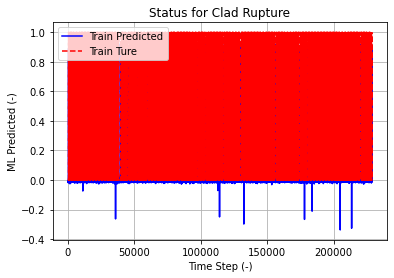

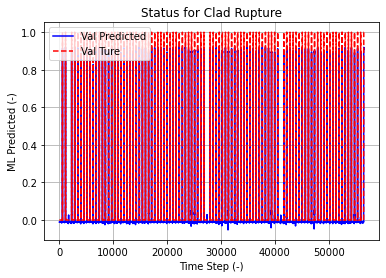

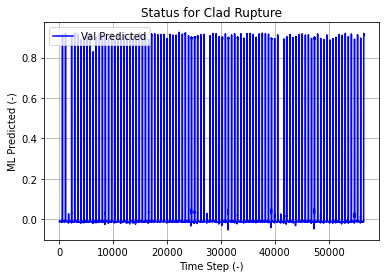

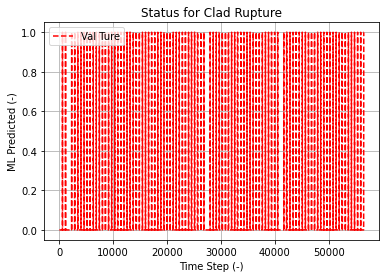

In [66]:
# plot predicted y        

# plot test and valication plot
fig = plt.figure()
ax = fig.gca()
#ax.set_aspect('equal')
plt.title('Status for Clad Rupture')
plt.xlabel('Time Step (-)')
plt.ylabel('ML Predicted (-)')
plt.plot(range(0,len(train_y_pred)),train_y_pred,'b-',range(0,len(train_y_pred)),train_Y,'r--')
plt.legend(['Train Predicted', 'Train Ture'], loc = 'upper left')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = fig.gca()
#ax.set_aspect('equal')
plt.title('Status for Clad Rupture')
plt.xlabel('Time Step (-)')
plt.ylabel('ML Predicted (-)')
plt.plot(range(0,len(val_y_pred)),val_y_pred,'b-',range(0,len(val_y_pred)),val_Y,'r--')
plt.legend(['Val Predicted', 'Val Ture'], loc = 'upper left')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = fig.gca()
#ax.set_aspect('equal')
plt.title('Status for Clad Rupture')
plt.xlabel('Time Step (-)')
plt.ylabel('ML Predicted (-)')
plt.plot(range(0,len(val_y_pred)),val_y_pred,'b-')
plt.legend(['Val Predicted'], loc = 'upper left')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = fig.gca()
#ax.set_aspect('equal')
plt.title('Status for Clad Rupture')
plt.xlabel('Time Step (-)')
plt.ylabel('ML Predicted (-)')
plt.plot(range(0,len(val_y_pred)),val_Y,'r--')
plt.legend(['Val Ture'], loc = 'upper left')
plt.grid(True)
plt.show()

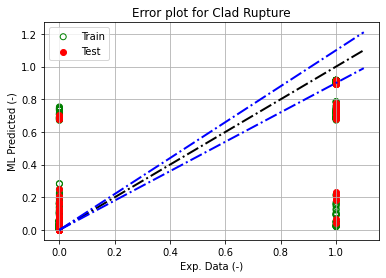

0

In [56]:
experiment1.prediction(n_start=0,n_end=5200)

In [73]:
mypath = "C:/Users/doubt/Desktop/TROD_LSTM/Data_TRACE2"
onlyfiles2 = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles2)

for i in range(0,len(onlyfiles2)):

    with open('./Data_TRACE2/'+ onlyfiles2[i], 'r') as program:
        data = program.readlines()
#        print(data)

    with open('./Data_TRACE2/'+ onlyfiles2[i], 'w') as program:
        for (number, line) in enumerate(data):
            program.write('%d\t%s' % (i, line))


read_files2 = glob.glob("./Data_TRACE2/*.txt")

with open("./Data_TRACE2/data.txt", "wb") as outfile:
    for f in read_files2:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

os.chdir('C:/Users/doubt/Desktop/TROD_LSTM/Data_TRACE2')
copyfile('data.txt', 'data.csv')
os.chdir('C:/Users/doubt/Desktop/TROD_LSTM')


['data.csv', 'data.txt', 'workdir.1.txt', 'workdir.10.txt', 'workdir.100.txt', 'workdir.101.txt', 'workdir.102.txt', 'workdir.103.txt', 'workdir.104.txt', 'workdir.105.txt', 'workdir.106.txt', 'workdir.107.txt', 'workdir.108.txt', 'workdir.109.txt', 'workdir.11.txt', 'workdir.110.txt', 'workdir.111.txt', 'workdir.112.txt', 'workdir.113.txt', 'workdir.114.txt', 'workdir.115.txt', 'workdir.116.txt', 'workdir.117.txt', 'workdir.118.txt', 'workdir.119.txt', 'workdir.12.txt', 'workdir.120.txt', 'workdir.121.txt', 'workdir.122.txt', 'workdir.123.txt', 'workdir.124.txt', 'workdir.125.txt', 'workdir.126.txt', 'workdir.127.txt', 'workdir.128.txt', 'workdir.129.txt', 'workdir.13.txt', 'workdir.130.txt', 'workdir.131.txt', 'workdir.132.txt', 'workdir.133.txt', 'workdir.134.txt', 'workdir.135.txt', 'workdir.136.txt', 'workdir.137.txt', 'workdir.138.txt', 'workdir.139.txt', 'workdir.14.txt', 'workdir.140.txt', 'workdir.141.txt', 'workdir.142.txt', 'workdir.143.txt', 'workdir.144.txt', 'workdir.145.

In [74]:
# read training data
test_df = pd.read_csv('./Data_TRACE2/data.csv', sep="\t", header=None)
test_df

,0,1,2,3,4,5,6,7,8,9
0,2,0.00000,585.18,0.0,0.0000,7134000.0,1005600.0,2098.1,0.000009,0
1,2,0.50871,585.22,0.0,0.0000,7041200.0,1004200.0,4233.1,0.000009,0
2,2,1.05700,584.06,0.0,0.0000,7048600.0,1004500.0,4233.1,0.000009,0
3,2,1.56600,581.46,0.0,0.0000,6965700.0,1043200.0,4233.1,0.000009,0
4,2,2.06910,577.74,0.0,0.0000,6911500.0,1123900.0,4233.1,0.000009,0
...,...,...,...,...,...,...,...,...,...,...
124420,201,347.63000,1258.50,0.0,1.9350,965560.0,965230.0,2844.0,0.001576,1
124421,201,348.13000,1259.40,0.0,1.0684,963090.0,962900.0,2844.0,0.001576,1
124422,201,348.65000,1259.90,0.0,2.4921,954110.0,954210.0,2844.0,0.001576,1
124423,201,349.15000,1262.40,0.0,5.9886,949060.0,948750.0,2844.0,0.001576,1


In [76]:
test_df.columns = ['id', 'time', 'T_clad', 'hoopS', 'heatR', 'P_flow', 'P_gap', 'T_rup', 'StrainR', 'Status']
test_df

# find the max length of the sequence
#restrict_length = max(list(train_df.groupby('id')['time'].max()))
ids2 = test_df.groupby('id')
restrict_length2 = max(list(ids2.size()))
print("the max length of the sequence is:", restrict_length2)

test_df[test_df < 0] = 0 # convert the negative values to zero
#train_df.X_a[train_df.X_a > 1] = 1

#train_df = convert_time_to_steps(train_df)
test_df = normalization(test_df)

#test_df.drop(['index'],axis = 1, inplace=True)
test_df.drop(['time'],axis = 1, inplace=True)   # add by YJ
test_df


the max length of the sequence is: 627


,id,T_clad,hoopS,heatR,P_flow,P_gap,T_rup,StrainR,Status
0,2,0.128054,0.0,0.000000,0.998050,0.177399,0.271952,0.002383,0.0
1,2,0.128095,0.0,0.000000,0.983221,0.176102,1.000000,0.002385,0.0
2,2,0.126907,0.0,0.000000,0.984403,0.176380,1.000000,0.002362,0.0
3,2,0.124243,0.0,0.000000,0.971156,0.212238,1.000000,0.002314,0.0
4,2,0.120433,0.0,0.000000,0.962495,0.287011,1.000000,0.002242,0.0
...,...,...,...,...,...,...,...,...,...
124420,201,0.817768,0.0,0.016911,0.012330,0.139994,0.526309,0.932107,1.0
124421,201,0.818690,0.0,0.009338,0.011936,0.137835,0.526309,0.932107,1.0
124422,201,0.819202,0.0,0.021780,0.010500,0.129783,0.526309,0.932107,1.0
124423,201,0.821763,0.0,0.052339,0.009694,0.124724,0.526309,0.932167,1.0


In [77]:
test_df

,id,T_clad,hoopS,heatR,P_flow,P_gap,T_rup,StrainR,Status
0,2,0.128054,0.0,0.000000,0.998050,0.177399,0.271952,0.002383,0.0
1,2,0.128095,0.0,0.000000,0.983221,0.176102,1.000000,0.002385,0.0
2,2,0.126907,0.0,0.000000,0.984403,0.176380,1.000000,0.002362,0.0
3,2,0.124243,0.0,0.000000,0.971156,0.212238,1.000000,0.002314,0.0
4,2,0.120433,0.0,0.000000,0.962495,0.287011,1.000000,0.002242,0.0
...,...,...,...,...,...,...,...,...,...
124420,201,0.817768,0.0,0.016911,0.012330,0.139994,0.526309,0.932107,1.0
124421,201,0.818690,0.0,0.009338,0.011936,0.137835,0.526309,0.932107,1.0
124422,201,0.819202,0.0,0.021780,0.010500,0.129783,0.526309,0.932107,1.0
124423,201,0.821763,0.0,0.052339,0.009694,0.124724,0.526309,0.932167,1.0


In [78]:
test_X, test_Y = gen_X_Y_one_to_one_not_padded(test_df,50)
test_X = np.array(test_X)
test_Y = np.array(test_Y)

test_y_pred = model.predict(test_X)

C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\doubt\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

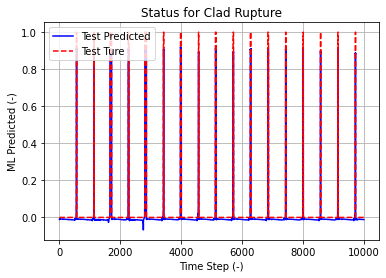

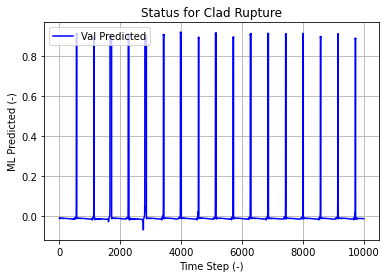

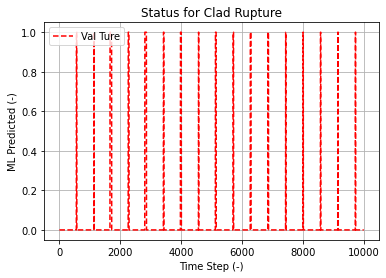

In [92]:
# plot predicted test y        

fig = plt.figure()
ax = fig.gca()
#ax.set_aspect('equal')
plt.title('Status for Clad Rupture')
plt.xlabel('Time Step (-)')
plt.ylabel('ML Predicted (-)')
plt.plot(range(0,10000),test_y_pred[0:10000],'b-',range(0,10000),test_Y[0:10000],'r--')
plt.legend(['Test Predicted', 'Test Ture'], loc = 'upper left')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = fig.gca()
#ax.set_aspect('equal')
plt.title('Status for Clad Rupture')
plt.xlabel('Time Step (-)')
plt.ylabel('ML Predicted (-)')
plt.plot(range(0,10000),test_y_pred[0:10000],'b-')
plt.legend(['Val Predicted'], loc = 'upper left')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = fig.gca()
#ax.set_aspect('equal')
plt.title('Status for Clad Rupture')
plt.xlabel('Time Step (-)')
plt.ylabel('ML Predicted (-)')
plt.plot(range(0,10000),test_Y[0:10000],'r--')
plt.legend(['Val Ture'], loc = 'upper left')
plt.grid(True)
plt.show()


In [89]:
res = [idx for idx, val in enumerate(test_Y) if val > 0.5]
res
res2 = [idx for idx, val in enumerate(test_y_pred) if val > 0.5]
res2


[556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1139,
 1140,
 1141,
 1661,
 1662,
 1663,
 1664,
 1665,
 1666,
 1667,
 1668,
 1669,
 1670,
 1671,
 1672,
 1673,
 1674,
 1675,
 1676,
 1677,
 1678,
 1679,
 1680,
 1681,
 1682,
 1683,
 1684,
 1685,
 1686,
 1687,
 1688,
 1689,
 1690,
 1691,
 1692,
 1693,
 1694,
 1695,
 1696,
 1697,
 1698,
 1699,
 1700,
 1701,
 1702,
 1703,
 1704,
 1705,
 1706,
 1707,
 1708,
 1709,
 1710,
 1711,
 1712,
 1713,
 1714,
 2259,
 2260,
 2261,
 2262,
 2263,
 2264,
 2265,
 2266,
 2267,
 2268,
 2269,
 2270,
 2271,
 2272,
 2273,
 2274,
 2275,
 2276,
 2277,
 2278,
 2279,
 2280,
 2281,
 2282,
 2283,
 2284,
 2805,
 2806,
 2807,
 2808,
 2809,
 2810,
 2811,
 2812,
 2813,
 2814,
 2815,
 2816,
 2817,
 2818,
 2819,
 2820,
 2821,
 2822,
 2823,
 2824,
 2825,
 2826,
 2827,
 2828,
 2829,
 2830,
 2831,
 2832,
 2833,
 2834,
 2835,
 2836,
 2837,
 2838,
 2839,
 2840,
 2841,
 2842,
 2843,
 2844

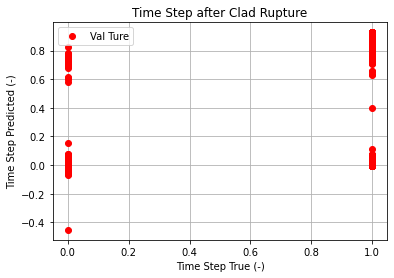

In [91]:
fig = plt.figure()
ax = fig.gca()
#ax.set_aspect('equal')
plt.title('Time Step after Clad Rupture')
plt.xlabel('Time Step True (-)')
plt.ylabel('Time Step Predicted (-)')
plt.plot(test_Y,test_y_pred,'ro')
plt.legend(['Val Ture'], loc = 'upper left')
plt.grid(True)
plt.show()

In [16]:
from numpy import genfromtxt

data3 = genfromtxt('./Data_TRACE/data.csv', delimiter='\t')

print(data3)

data_i = data3[:,2:-1]
data_o = data3[:,-1:]

print(data_o)

[[0.0000e+00 0.0000e+00 5.8518e+02 ... 1.0056e+06 2.0981e+03 0.0000e+00]
 [0.0000e+00 5.0871e-01 5.8432e+02 ... 1.0041e+06 4.2331e+03 0.0000e+00]
 [0.0000e+00 1.0570e+00 5.8312e+02 ... 1.0046e+06 4.2331e+03 0.0000e+00]
 ...
 [9.9000e+01 3.4871e+02 1.3214e+03 ... 9.5259e+05 2.8440e+03 1.0000e+00]
 [9.9000e+01 3.4922e+02 1.3275e+03 ... 9.5508e+05 2.8440e+03 1.0000e+00]
 [9.9000e+01 3.4972e+02 1.3313e+03 ... 9.6392e+05 2.8440e+03 1.0000e+00]]
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [2]:

# multivariate lstm example
from numpy import array
from numpy import hstack
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
#dataset = hstack((in_seq1, in_seq2, out_seq))
dataset = hstack((data_i, data_o))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# the dataset knows the number of features, e.g. 2
#n_features = X.shape[2]
n_features = X.shape[2]

print(X.shape, y.shape)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])

NameError: name 'data_i' is not defined

In [25]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=10, verbose=1)

# demonstrate prediction
#x_input = array([[80.0, 85.0], [90.0, 95.0], [100.0, 105.0]])
x_input = X
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

Train on 61947 samples
Epoch 1/10
61947/61947 [==============================] - 5s 87us/sample - loss: 1009224497.8012
Epoch 2/10
61947/61947 [==============================] - 4s 65us/sample - loss: 22637308.3337
Epoch 3/10
61947/61947 [==============================] - 4s 65us/sample - loss: 2688754.1552
Epoch 4/10
61947/61947 [==============================] - 4s 65us/sample - loss: 2557665.1791
Epoch 5/10
61947/61947 [==============================] - 4s 61us/sample - loss: 2029468.9698
Epoch 6/10
61947/61947 [==============================] - 4s 61us/sample - loss: 1396853.5451
Epoch 7/10
61947/61947 [==============================] - 4s 65us/sample - loss: 1489118.6470
Epoch 8/10
61947/61947 [==============================] - 4s 68us/sample - loss: 1330628.7362
Epoch 9/10
61947/61947 [==============================] - 4s 68us/sample - loss: 798251.1578
Epoch 10/10
61947/61947 [==============================] - 4s 67us/sample - loss: 657223.0596


ValueError: cannot reshape array of size 1115046 into shape (1,3,6)

In [76]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [87]:
# demonstrate prediction
x_input = array([[70.0,75.0,145.0], [80.0,85.0,165.0], [90.0,95.0,185.0]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

TypeError: predict() got an unexpected keyword argument 'epochs'